In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [10]:
path = './Desktop/creditcard.csv'
df = pd.read_csv("creditcard.csv")

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
# Drop Time and Class column - irrelevant to autoencoder

df = df.drop(['Time', 'Class'], axis = 1)
df.shape

(284807, 29)

In [13]:
from sklearn.preprocessing import StandardScaler

# scale the v1 to v28 columns
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

In [14]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,149.62
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,2.69
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,378.66
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,123.50
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,69.99


In [15]:
from sklearn.model_selection import train_test_split

# split
x_train, x_test = train_test_split(df, test_size=0.2)

print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)

x_train shape :  (227845, 29)
x_test shape :  (56962, 29)


In [16]:
# build the model

from keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers, models

encoder = tf.keras.models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(10, activation='relu')
])
        
decoder = tf.keras.models.Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear')
])
        
model = tf.keras.models.Sequential([
    encoder,
    decoder,
])

In [17]:
model.compile(optimizer='adam', loss ='mean_squared_error')

In [18]:
history = model.fit(
    x_train, 
    x_train, 
    validation_data=(x_test,x_test),
    epochs=10,
    batch_size = 500,
    shuffle=True
)

Epoch 1/10

456/456 [==============================] - 2s 2ms/step - loss: 178.2476 - val_loss: 1.3360
Epoch 2/10
456/456 [==============================] - 1s 1ms/step - loss: 0.8202 - val_loss: 0.8316
Epoch 3/10
456/456 [==============================] - 1s 1ms/step - loss: 0.7869 - val_loss: 1.6612
Epoch 4/10
456/456 [==============================] - 1s 1ms/step - loss: 0.7977 - val_loss: 0.8459
Epoch 5/10
456/456 [==============================] - 1s 1ms/step - loss: 0.7907 - val_loss: 0.7125
Epoch 6/10
456/456 [==============================] - 1s 1ms/step - loss: 0.7887 - val_loss: 1.5360
Epoch 7/10
456/456 [==============================] - 1s 1ms/step - loss: 0.9135 - val_loss: 0.6691
Epoch 8/10
456/456 [==============================] - 1s 1ms/step - loss: 0.6624 - val_loss: 0.6879
Epoch 9/10
456/456 [==============================] - 1s 1ms/step - loss: 0.9059 - val_loss: 0.8564
Epoch 10/10
456/456 [==============================] - 1s 1ms/step - loss: 0.7481 - val_loss: 0.6

<Axes: >

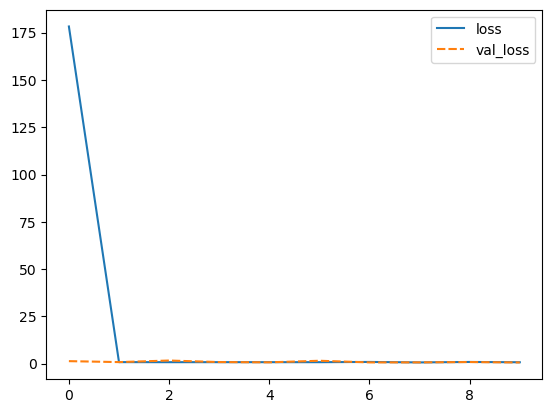

In [19]:
import seaborn as sns
sns.lineplot(model.history.history)

In [20]:
predictions = model.predict(x_test)

1781/1781 [==============================] - 1s 657us/step


In [21]:
# calculate Mean Squared Error for each test sample

mse = np.mean(np.power(x_test - predictions, 2), axis=1)
mse

171485    0.291046
205479    0.253106
59964     0.709596
154756    0.979504
262352    0.364517
            ...   
71712     0.229608
148247    0.918140
177037    0.335483
84085     0.718264
195966    1.002555
Length: 56962, dtype: float64

In [22]:
# take 95th percentile of the threshold
# i.e the top 5 % of the outliers

threshold = np.percentile(mse, 95)
threshold

1.19078801503487

In [23]:
# 
anomalies = mse > threshold

In [24]:
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 2849
